In [1]:
# 梯度下降
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

In [2]:
def f(x): # ⽬标函数
    return x ** 2
def f_grad(x): # ⽬标函数的梯度(导数)
    return 2 * x

In [3]:
'''
接下来，我们使⽤x = 10作为初始值，并假设η = 0.2。使⽤梯度下降法迭代x共10次，我们可以看到，x的值
最终将接近最优解
'''
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10): # 迭代10次
        x -= eta * f_grad(x) # 梯度下降
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results
results = gd(0.2, f_grad)

epoch 10, x: 0.060466


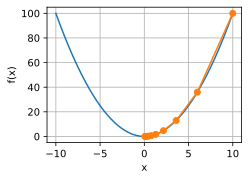

In [4]:
'对进⾏x优化的过程可以绘制如下'
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])
show_trace(results, f)

epoch 10, x: 3.486784


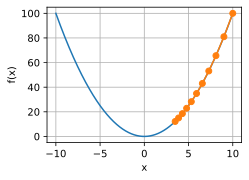

In [5]:
# 学习率
'''
学习率（learning rate）决定⽬标函数能否收敛到局部最⼩值，以及何时收敛到最⼩值。学习率η可由算法设
计者设置。请注意，如果我们使⽤的学习率太⼩，将导致x的更新⾮常缓慢，需要更多的迭代。例如，考虑同
⼀优化问题中η = 0.05的进度。如下所⽰，尽管经过了10个步骤，我们仍然离最优解很远
'''
show_trace(gd(0.05, f_grad), f)


epoch 10, x: 61.917364


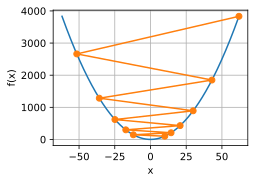

In [6]:
'''
相 反， 如 果 我 们 使 ⽤ 过 ⾼ 的 学 习 率，|ηf ′(x)|对 于 ⼀ 阶 泰 勒 展 开 式 可 能 太 ⼤。 也 就 是 说，(11.3.1)中
的O(η2f ′2(x))可能变得显著了。在这种情况下，x的迭代不能保证降低f(x)的值。例如，当学习率为η = 1.1时，
x超出了最优解x = 0并逐渐发散
'''
show_trace(gd(1.1, f_grad), f)

epoch 10, x: -1.528166


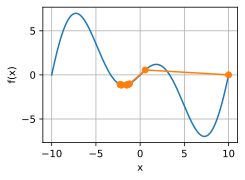

In [7]:
# 局部最小值
'''
为了演⽰⾮凸函数的梯度下降，考虑函数f(x) = x · cos(cx)，其中c为某常数。这个函数有⽆穷多个局部最⼩
值。根据我们选择的学习率，我们最终可能只会得到许多解的⼀个。下⾯的例⼦说明了（不切实际的）⾼学
习率如何导致较差的局部最⼩值
'''
c = torch.tensor(0.15 * np.pi)

def f(x): # ⽬标函数
    return x * torch.cos(c * x)

def f_grad(x): # ⽬标函数的梯度
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

In [8]:
# 多元梯度下降
def train_2d(trainer, steps=20, f_grad=None): #@save
    """⽤定制的训练机优化2D⽬标函数"""
    # s1和s2是稍后将使⽤的内部状态变量
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

def show_trace_2d(f, results): #@save
    """显⽰优化过程中2D变量的轨迹"""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                            torch.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 20, x1: -0.057646, x2: -0.000073


/home/ubuntu/anaconda3/envs/d2l/lib/python3.8/site-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  /opt/conda/conda-bld/pytorch_1659484683044/work/aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


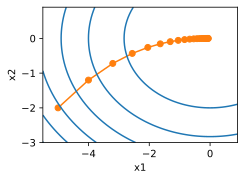

In [9]:
'''
接下来，我们观察学习率η = 0.1时优化变量x的轨迹。可以看到，经过20步之后，x的值接近其位于[0, 0]的最
⼩值。虽然进展相当顺利，但相当缓慢
'''
def f_2d(x1, x2): # ⽬标函数
    return x1 ** 2 + 2 * x2 ** 2
def f_2d_grad(x1, x2): # ⽬标函数的梯度
    return (2 * x1, 4 * x2)
def gd_2d(x1, x2, s1, s2, f_grad): # 梯度下降
    g1, g2 = f_grad(x1, x2) # 计算梯度
    return (x1 - eta * g1, x2 - eta * g2, 0, 0) # 梯度下降

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

epoch 10, x: tensor(0.)


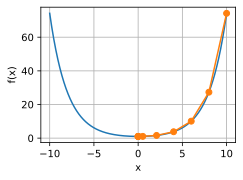

In [10]:
# 自适应方法
# 牛顿法 -> 二阶泰勒展开
'''
∇f(x) + Hϵ = 0 and hence ϵ = −H−1∇f(x).

作为优化问题的⼀部分，我们需要将Hessian矩阵H求逆
'''
c = torch.tensor(0.5)
def f(x): # O⽬标函数
    return torch.cosh(c * x) # 凸双曲余弦函数
def f_grad(x): # ⽬标函数的梯度
    return c * torch.sinh(c * x)
def f_hess(x): # ⽬标函数的Hessian
    return c**2 * torch.cosh(c * x)
def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x) # 梯度下降
        results.append(float(x))
    print('epoch 10, x:', x)
    return results
show_trace(newton(), f)

epoch 10, x: tensor(26.8341)


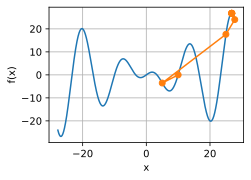

In [11]:
''' 
现在让我们考虑⼀个⾮凸函数，⽐如f(x) = x cos(cx)，c为某些常数。请注意在⽜顿法中，我们最终将除
以Hessian。这意味着如果⼆阶导数是负的，f的值可能会趋于增加。这是这个算法的致命缺陷！让我们看看
实践中会发⽣什么
'''
c = torch.tensor(0.15 * np.pi)
def f(x): #⽬标函数
    return x*torch.cos(c*x) # 非凸函数
def f_grad(x): #⽬标函数的梯度
    return torch.cos(c*x)-c*x*torch.sin(c*x) 
def f_hess(x): #⽬标函数的Hessian 
    return-2*c*torch. sin(c*x)-x*c**2*torch.cos(c*x) 
show_trace(newton(), f)

epoch 10, x: tensor(7.2699)


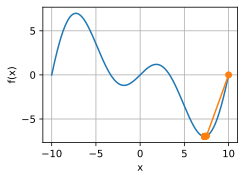

In [12]:
''' 
这发⽣了惊⼈的错误。我们怎样才能修正它？⼀种⽅法是⽤取Hessian的绝对值来修正，另⼀个策略是重新
引⼊学习率。这似乎违背了初衷，但不完全是————拥有⼆阶信息可以使我们在曲率较⼤时保持谨慎，⽽在⽬
标函数较平坦时则采⽤较⼤的学习率。让我们看看在学习率稍⼩的情况下它是如何⽣效的，⽐如η = 0.5。如
我们所⻅，我们有了⼀个相当⾼效的算法
'''
show_trace(newton(0.5), f)

In [13]:
'''
⼩结
• 学习率的⼤⼩很重要：学习率太⼤会使模型发散，学习率太⼩会没有进展
• 梯度下降会可能陷⼊局部极⼩值，⽽得不到全局最⼩值
• 在⾼维模型中，调整学习率是很复杂的
• 预处理有助于调节⽐例
• ⽜顿法在凸问题中⼀旦开始正常⼯作，速度就会快得多
• 对于⾮凸问题，不要不作任何调整就使⽤⽜顿法
'''


' \n⼩结\n• 学习率的⼤⼩很重要：学习率太⼤会使模型发散，学习率太⼩会没有进展\n• 梯度下降会可能陷⼊局部极⼩值，⽽得不到全局最⼩值\n• 在⾼维模型中，调整学习率是很复杂的\n• 预处理有助于调节⽐例\n• ⽜顿法在凸问题中⼀旦开始正常⼯作，速度就会快得多\n• 对于⾮凸问题，不要不作任何调整就使⽤⽜顿法\n'